# Survival Prediction for Titanic dataset

In [ ]:
# Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [ ]:
df1 = pd.read_csv("\Titanic-Dataset.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.shape

(891, 12)

# Handling Null values

In [ ]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin has a lot of null values. So we can drop that column and impute the age with forward fill. 

<Axes: >

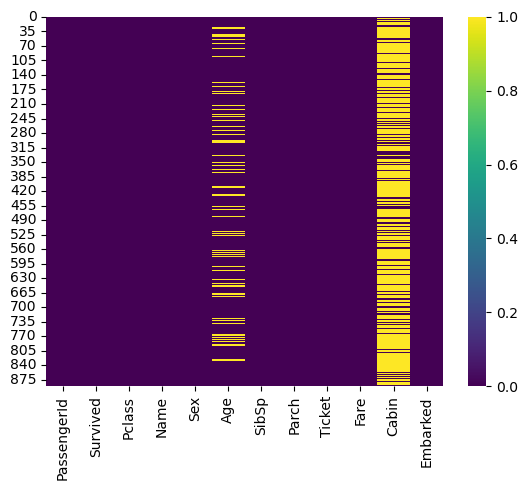

In [ ]:
# Creating the heatmap for missing values

sns.heatmap(df1.isna(), cmap='viridis')

In [ ]:
df2 = df1.copy() # copying and working with the dataset in order to not collapse the original data

In [ ]:
df2 = df2.drop(columns=['Cabin'])  # dropping the column cabin
df2['Age'] = df2['Age'].ffill()  # Forward filling the age column

<Axes: >

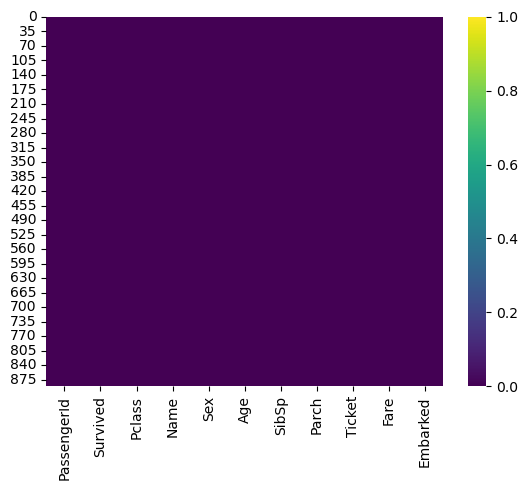

In [ ]:
sns.heatmap(df2.isna(), cmap='viridis')

# Performing EDA

In [ ]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Count of survived / not survived by gender
# Count of survived / not survived by embarked
# age vs survived based on gender
# pclass vs survived based on gender
# gender vs fare

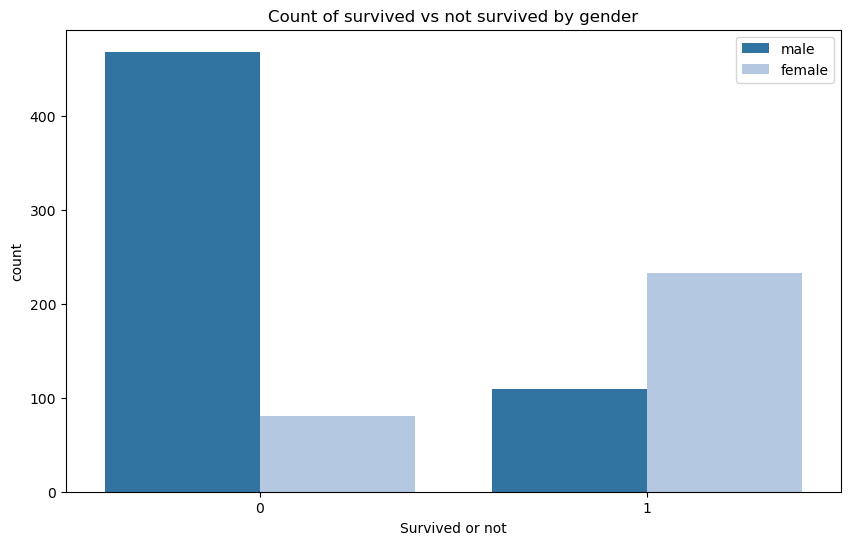

In [ ]:
# Count of survived / not survived by gender

plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data= df2 , hue='Sex', palette='tab20')
plt.title("Count of survived vs not survived by gender")
plt.xlabel('Survived or not')
plt.legend()
plt.show()

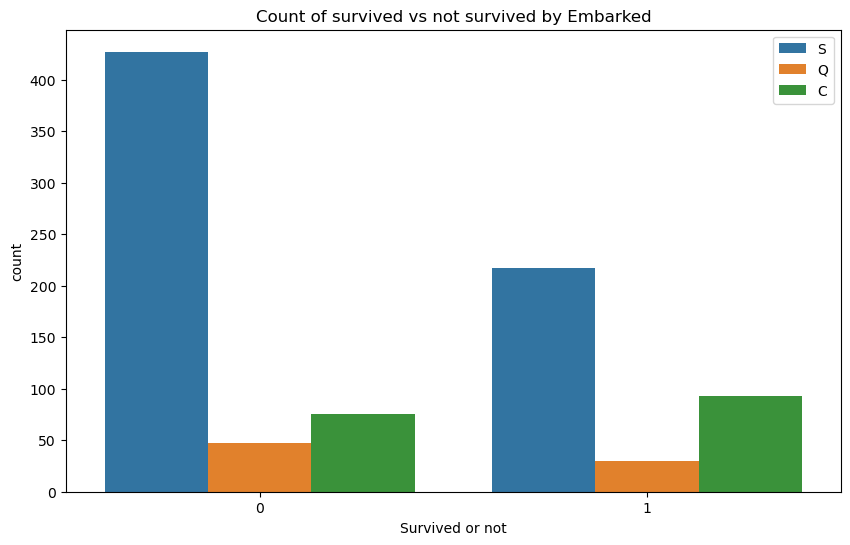

In [ ]:
# Count of survived by embarked

plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data= df2 , hue='Embarked', palette='tab10')
plt.title("Count of survived vs not survived by Embarked")
plt.xlabel('Survived or not')
plt.legend()
plt.show()


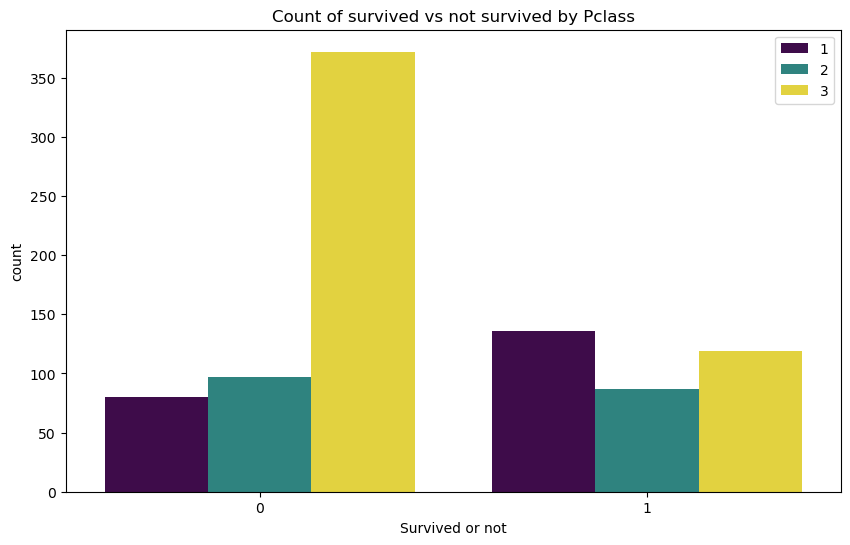

In [ ]:
# Survived vs not survived based on Pclass

plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data= df2 , hue='Pclass', palette='viridis')
plt.title("Count of survived vs not survived by Pclass")
plt.xlabel('Survived or not')
plt.legend()
plt.show()

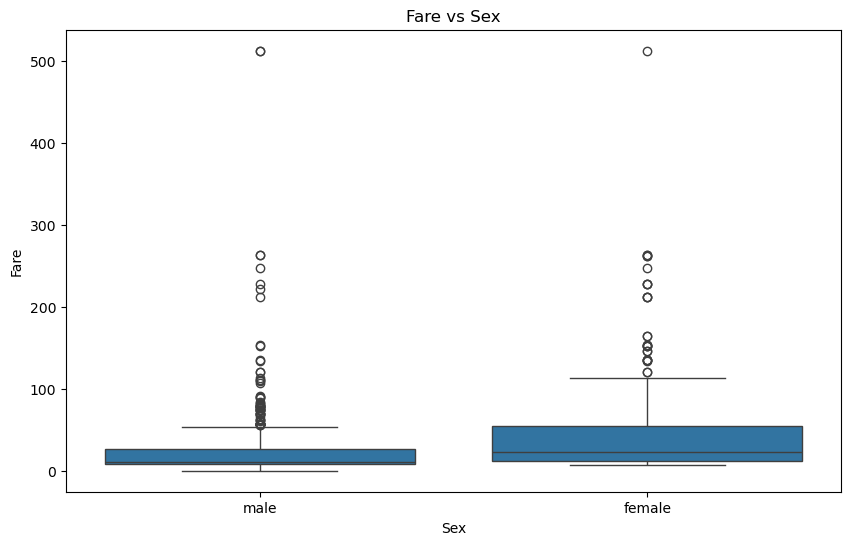

In [ ]:
# Fare vs Gender

plt.figure(figsize=(10,6))
sns.boxplot(x='Sex',y='Fare', data= df2)
plt.title("Fare vs Sex")
plt.show()

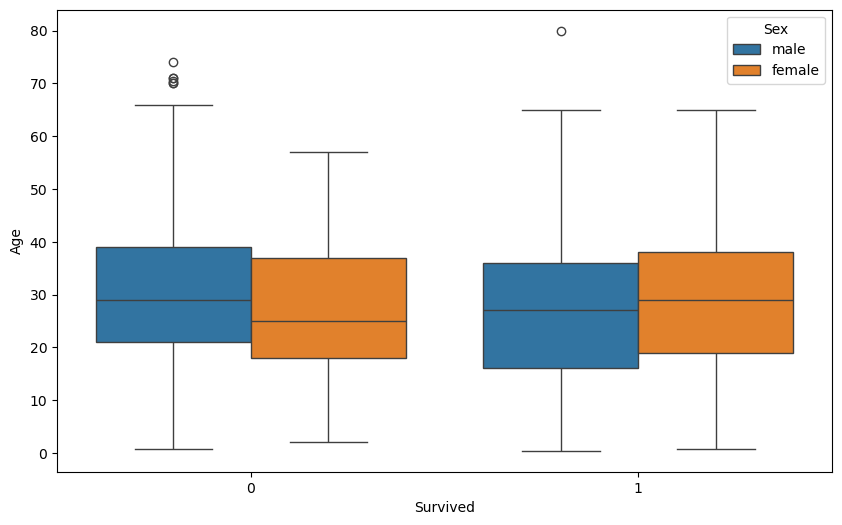

In [ ]:
# Survived vs Age by Sex

plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df2)
plt.show()


# Handling Outliers

In [ ]:
# Creating a variable for numerical and categorical columns

num_cols = df2.select_dtypes(include=['int64','float64']).columns
cat_cols = df2.select_dtypes(exclude=['int64', 'float64']).columns

In [ ]:
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


In [ ]:
# Detecting outliers using IQR method

def det_outliers(data, columns):
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return data[(data[columns] < lower) | (data[columns] > upper)]

for col in num_cols:
    outliers = det_outliers(df2, col)
    if len(outliers) > 0:
        print(f"{col} : {len(outliers)} outliers") 

Age : 8 outliers
SibSp : 46 outliers
Parch : 213 outliers
Fare : 116 outliers


We dont apply outlier handling techniques for age since the number is low, so checking the distribution for other three variables

<Axes: xlabel='SibSp', ylabel='Count'>

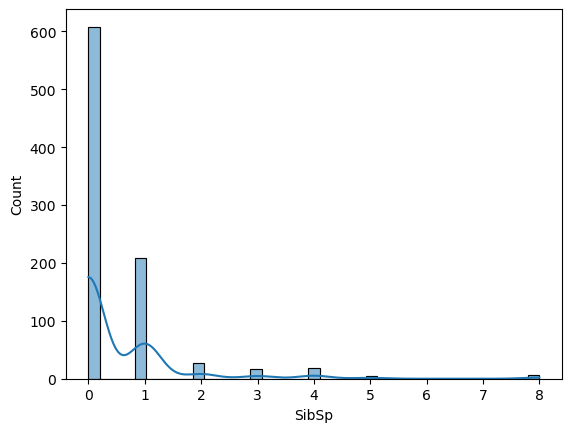

In [ ]:
# Checking the distribution of 'SibSp'

sns.histplot(df2['SibSp'], kde=True)

In [ ]:
# Checking the number of records after value 4

count_sibsp = (df2['SibSp'] > 4 ).sum()
count_sibsp

12

In [ ]:
df2['SibSp'] = df2['SibSp'].clip(upper=5) # Clipping the values for 'SibSp'

Out of 891 records only 12 records have values more than 4. So, we clip the values at 5

<Axes: xlabel='Parch', ylabel='Count'>

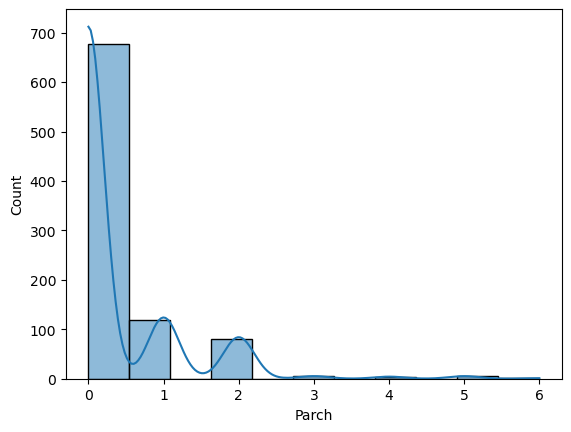

In [ ]:
# Checking the distribution of 'Parch'

sns.histplot(df2['Parch'], kde=True)

In [ ]:
# Checking the total number of records after value 3

count_parch = (df2['Parch'] > 3).sum()
count_parch

10

In [ ]:
df2['Parch'] = df2['Parch'].clip(upper=4) # clipping the values for 'Parch'

Same as 'Sibsp' the number of records after value 3 is 10, so we clip the values at 4

<Axes: xlabel='Fare', ylabel='Count'>

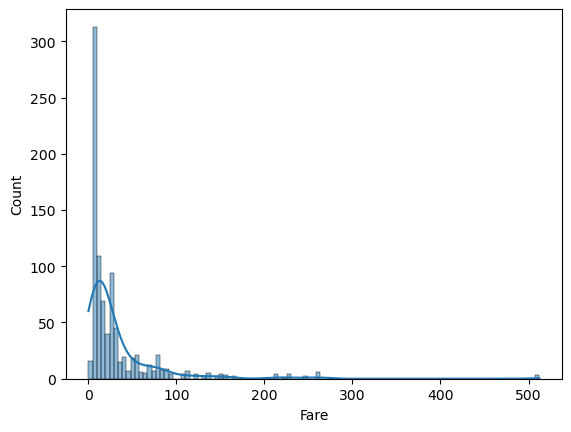

In [ ]:
# Checking the distribution of 'Fare'
sns.histplot(df2['Fare'], kde=True)

In [ ]:
# Checking the total number of records after value 200
count_fare = (df2['Fare'] > 200).sum()
count_fare

20

In [ ]:
df2['Fare'] = df2['Fare'].clip(upper = 200) # clipping the values for 'Fare'

Similar to 'SibSp' and 'Parch' the number of records after the value 200 is 20. So we clip all the values at 200

<Axes: xlabel='Age', ylabel='Count'>

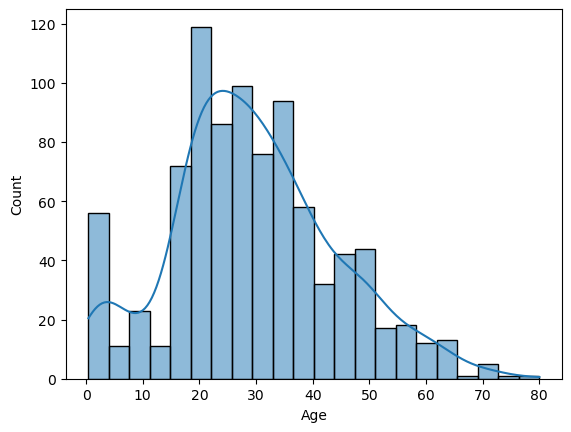

In [ ]:
# Checking the distribution plot for age

sns.histplot(df2['Age'], kde=True)

# Feature Engineering

# Encoding categorical columns into numerical

In [ ]:
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [ ]:
# 'Name' and 'ticket' is not a good feature to include here so removing them

df2 = df2.drop(columns=['Name', 'Ticket'])

In [ ]:
# For the given categorical variables one-hot encoding seems to be the better choice

df2 = pd.get_dummies(df2, columns=['Sex', 'Embarked'])

In [ ]:
df2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


<Axes: >

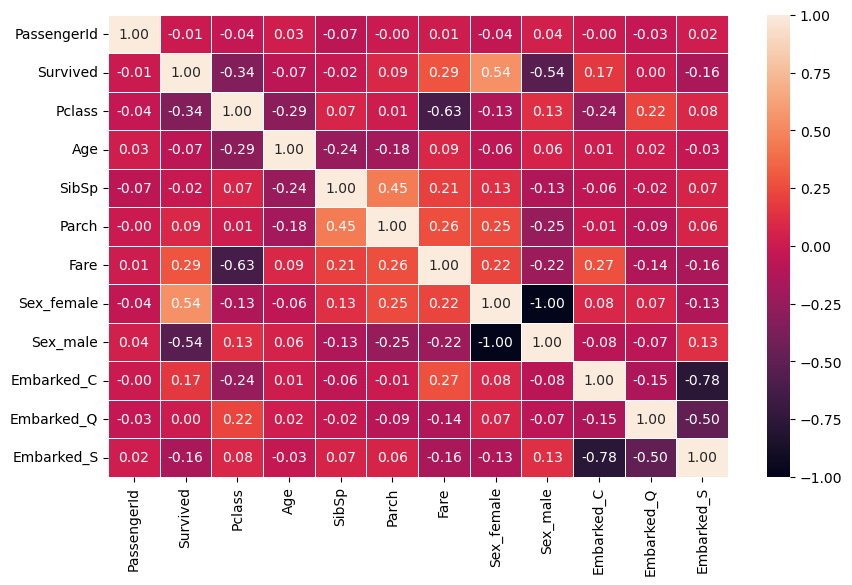

In [ ]:
# Checking the correlation for all the variables
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(numeric_only=True), annot=True, linewidths=0.5, fmt='.2f')

In [ ]:
# PassengerId doesn't seem to be good for the prediction, so removing that column

df2 = df2.drop(columns=['PassengerId'])

In [ ]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


# Splitting the dataset and training the model

In [135]:
Y = df2['Survived']

df2 = df2.drop(columns=['Survived'])
X = df2

In [136]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [138]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

x_train_scaled = rs.fit_transform(x_train)
x_test_scaled = rs.transform(x_test)

In [139]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

c:\Users\pandi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [140]:
y_pred = logit_model.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)

In [143]:
print(f"The accuracy of the model on training datset is: {accuracy}")

The accuracy of the model on training datset is: 0.8033707865168539


Testing the model's performance on testing dataset

In [148]:
y_pred_test = logit_model.predict(x_test)

In [155]:
y_prob = logit_model.predict_proba(x_test)[:,1]

Accuracy:  0.7932960893854749
Precision: 0.7681159420289855
Recall: 0.7162162162162162
F1 Score: 0.7412587412587412
ROC AUC: 0.8875160875160876
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



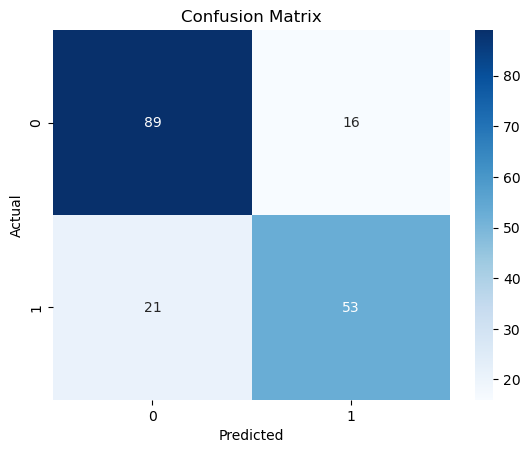

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

#Classification report
print(classification_report(y_test, y_pred_test))


#Confusion matrix

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()